# Investigation of ODI Cricket Data

With one of the most dramatic One Day International (ODI) Cricket World Cups there has ever been behind us, here we'll have a close look at some of the statistics behind this weird and wonderful game.

### ODI Cricket Overview

- Each team has 11 players
- Each team has a single 50 over innings (6 balls in an over), to amas their score. The innings ends when they reach 50 overs, lose 10 wickets or catch their oponents score.
- The batting order is decided by the team captain after a coin toss

### Data
The data used in this report has been has been downloaded from [this kaggle kernel](https://www.kaggle.com/venky73/icc-cricket-world-cup-2019-analysis), with some additional data collected directly from [https://www.espncricinfo.com/](https://www.espncricinfo.com/). The data gathering and cleaning process is documented in [ODI_Cricket_Wrangle](ODI_Cricket_Wrangle.ipynb). 

The set contains data collected between 2013 and 2019 up until just before the Cricket World Cup.

## Questions

Here are some of the questions that we'll try to answer with the data:

**Win Percentages:**
1. Which team has the highest win percentage overall and in England?
1. How does batting order and coint toss affect?
1. How does a losing or winning a match impact on the result of their next game?

**Score and runs per over:**
1. What is the relationship between team scores and runs per over?
1. How does winning the toss and batting order affect the scoring rates?
1. How have the scoring average and scoring rates change between 2013 - 2019?

**Overall Performance:**
1. What is a good target score for a team to aim for in order to win the game?
1. What batting order is most common after winning the toss and what choice is most successful?
1. Which team make the best choices?

We'll conclude by recommending targets for the best winning formular.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.lines as mlines

%matplotlib inline

import os
import sys
module_path = os.path.abspath(os.path.join("../src"))
if module_path not in sys.path:
    sys.path.append(module_path)
assert '/home/ding/coding/machine_learning/ODI_cricket/src' in sys.path
from visualization import visualize as vis

df_match = pd.read_csv('../Data/interim/ODI_match_clean.csv')
df_totals = pd.read_csv('../Data/interim/ODI_totals_clean.csv')

# Update column data types
df_match.start_date = pd.to_datetime(df_match.start_date)
cat_cols = ['team1', 'team2', 'ground', 'result']
for col in cat_cols:
    df_match[col] = df_match[col].astype('category')
    
df_totals.start_date = pd.to_datetime(df_totals.start_date)
cat_cols = ['country', 'opposition', 'result','bat']
for col in cat_cols:
    df_totals[col] = df_totals[col].astype('category')
    
c=sb.color_palette()

## Analysis
Lets go through the questions in order and see what conclusions can be drawn from the data.
***
### Win Percentages

In [137]:
df_pcnts = df_totals.copy()
df_pcnts = df_pcnts.merge(df_match.loc[:,['match_id','ground']], on='match_id')
df_pcnts.country = df_pcnts.country.astype(object)
df_pcnts = df_pcnts[df_pcnts.result.isin(['won','lost', 'tied'])]
df_pcnts['result_dum'] = np.where(df_pcnts.result=="won",1,0)

In [89]:
import importlib
importlib.reload(vis)

<module 'visualization.visualize' from '/home/ding/coding/machine_learning/ODI_cricket/src/visualization/visualize.py'>

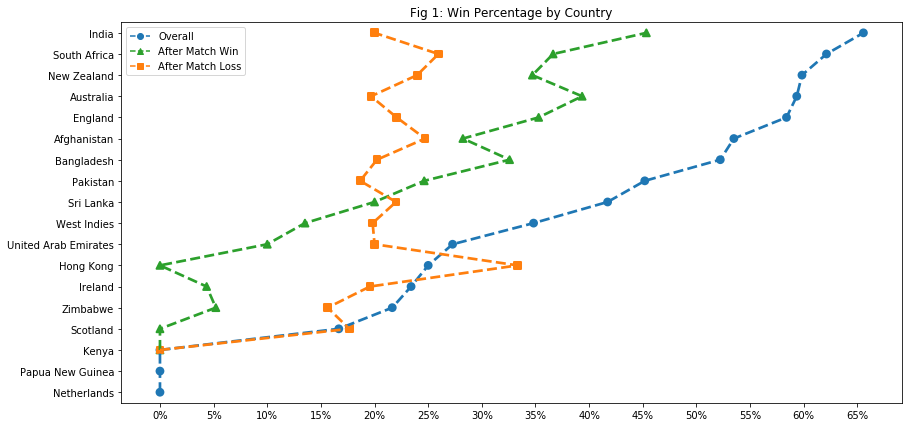

In [134]:
# Overall win proportions
win_prop = df_pcnts.groupby('country').mean()['result_dum'].sort_values()
order= win_prop.index

# Win after result proportions
lose_win_prop = vis.winAfterLoss(df_pcnts, order)
win_win_prop = vis.winAfterWin(df_pcnts, order)

plt.figure(figsize=[14,7])
s1 = sb.pointplot(x=win_prop.values, y=win_prop.index, order=order, color=c[0], 
                      linestyles='--', markers='o')
s2 = sb.pointplot(x=win_win_prop.values.flatten(), y=win_win_prop.index, order=order, color=c[2], 
                      linestyles='--', markers='^')
s3 = sb.pointplot(x=lose_win_prop.values.flatten(), y=lose_win_prop.index, order=order, color=c[1], 
                      linestyles='--', markers=',')

l0 = mlines.Line2D([],[],color=c[0], linestyle='--', marker='o')
l1 = mlines.Line2D([],[],color=c[1], linestyle='--', marker='s')
l2 = mlines.Line2D([],[],color=c[2], linestyle='--', marker='^')



plt.legend((l0,l2,l1), ('Overall', 'After Match Win', 'After Match Loss'), title="")

plt.title("Fig 1: Win Percentage by Country");
plt.gca().invert_yaxis();

ticks = np.arange(0,0.7,0.05)
labels = ['{:.0f}%'.format(i*100) for i in ticks]

plt.xticks(ticks, labels)
plt.ylabel("");
plt.xlabel("");

Figure 1 shows the overall win percentage per team alongside the breakdown of whether those wins occur after a match win or a match loss. India are the most successful team in terms of overall win percentage and proportion of win streaks.

The top 10 countries in this table are the countries which took part in this years world cup. Lets see how they perform on English soil.

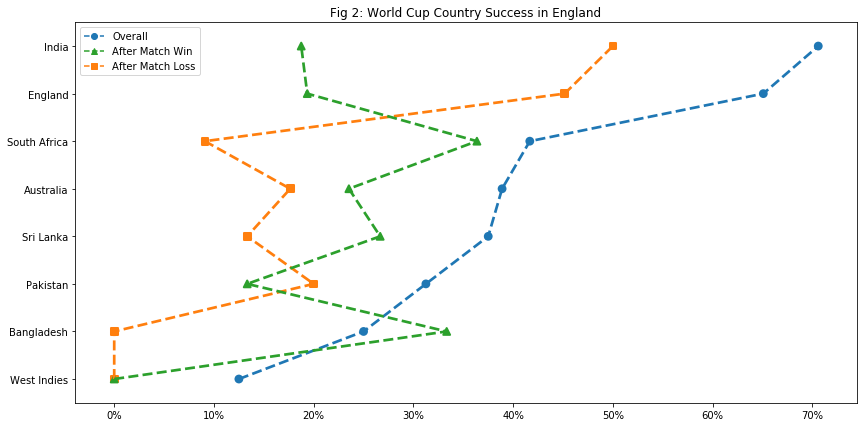

In [149]:
english_grounds = ['The Oval', 'Birmingham', 'Cardiff', 'Nottingham', 'Southampton', 'Leeds', "Lord's", 
                   'Manchester', 'Chester-le-Street', 'Bristol', 'East London']
cup_countries = ['Afghanistan', 'Australia', 'Bangladesh', 'England', 'India', 'Pakistan', 
                 'South Africa', 'Sri Lanka', 'West Indies']

# Win proportions in England
win_prop = df_pcnts[(df_pcnts.ground.isin(english_grounds))&
                      (df_pcnts.country.isin(cup_countries))].groupby('country').mean()['result_dum'].sort_values()
order= win_prop.index

# Proportions after match result
win_win_prop = vis.winAfterWin(df_pcnts[(df_pcnts.ground.isin(english_grounds))&(df_pcnts.country.isin(cup_countries))],
                              countries=cup_countries)
lose_win_prop = vis.winAfterLoss(df_pcnts[(df_pcnts.ground.isin(english_grounds))&(df_pcnts.country.isin(cup_countries))],
                              countries=cup_countries)

plt.figure(figsize=[14,7])
sb.pointplot(x=win_prop.values, y=win_prop.index, color=c[0], order=order, linestyles='--', markers='o');
sb.pointplot(x=win_win_prop.values.flatten(), y=win_win_prop.index, color=c[1], order=order, linestyles='--', markers='s');
sb.pointplot(x=lose_win_prop.values.flatten(), y=lose_win_prop.index, color=c[2], order=order, linestyles='--', markers='^');

l0 = mlines.Line2D([],[],color=c[0], linestyle='--', marker='o')
l1 = mlines.Line2D([],[],color=c[1], linestyle='--', marker='s')
l2 = mlines.Line2D([],[],color=c[2], linestyle='--', marker='^')

plt.legend((l0,l2,l1), ('Overall', 'After Match Win', 'After Match Loss'), title="")

plt.title("Fig 2: World Cup Country Success in England");
plt.gca().invert_yaxis();

ticks = np.arange(0,0.8,0.1)
labels = ['{:.0f}%'.format(i*100) for i in ticks]

plt.xticks(ticks, labels)
plt.ylabel("");
plt.xlabel("");


India and England are the most successful teams on English grounds. India sit atop this chart and the overall charts. Its clear to see why they were strong contenders going into this World Cup. 

Afghanistan have not played in any matches in England so were a mystery team heading into the World Cup.
***
Lets look at the team performances vs the batting order and result of the coin toss.

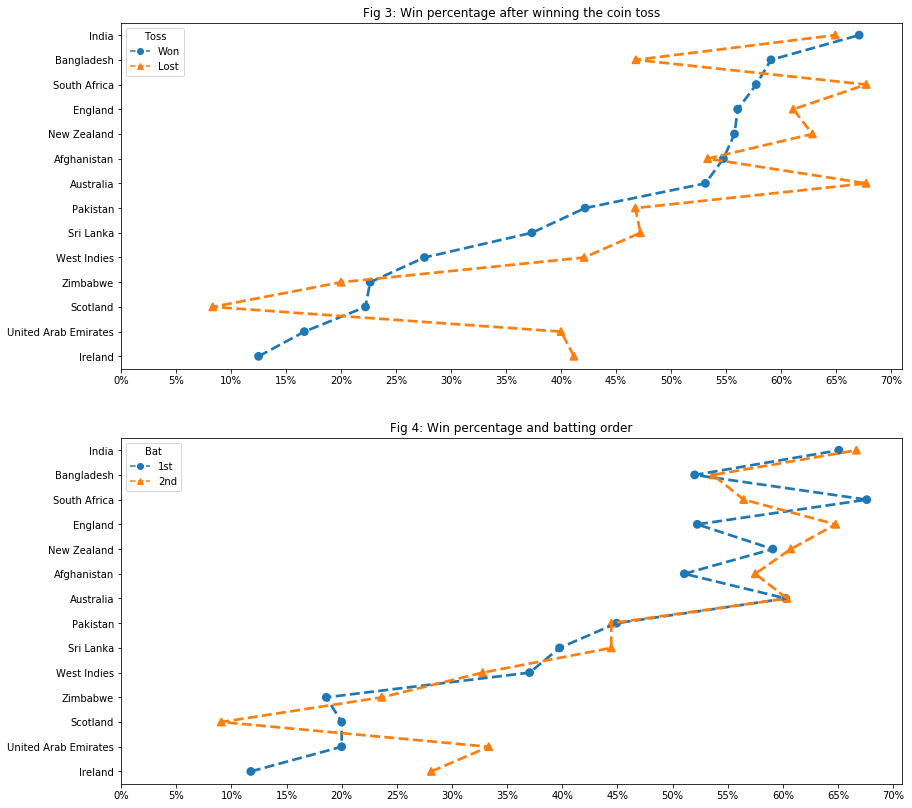

In [168]:
# Win after winning toss proportions
win_win = df_pcnts[df_pcnts.toss=='won'].groupby('country').mean()['result_dum'].sort_values().dropna().tail(14)
order = win_win.index

# Win after losing toss proportions
lose_win = df_pcnts[df_pcnts.toss=='lost'].groupby('country').mean()['result_dum'][order].dropna()

ticks = np.arange(0,0.75,0.05)
labels = ['{:.0f}%'.format(i*100) for i in ticks]

plt.subplots(2,1,figsize=[14,14]);
plt.subplot(2,1,1);
s1 = sb.pointplot(x=win_win.values, y=win_win.index, order=order, color=c[0], 
                      linestyles='--', markers='o')

s2 = sb.pointplot(x=lose_win.values, y=lose_win.index, order=order, color=c[1], 
                      linestyles='--', markers='^')

l0 = mlines.Line2D([],[],color=c[0], linestyle='--', marker='o')
l1 = mlines.Line2D([],[],color=c[1], linestyle='--', marker='^')

plt.legend((l0,l1), ('Won', 'Lost'), title="Toss")

plt.title("Fig 3: Win percentage after winning the coin toss");
plt.gca().invert_yaxis();

plt.xticks(ticks, labels)
plt.ylabel("");
plt.xlabel("");




# Win after batting 1st proportions
bat1win= df_pcnts[df_pcnts.bat=='1st'].groupby('country').mean()['result_dum'].sort_values()[order]

# Win after batting 2nd proportions
bat2win = df_pcnts[df_pcnts.bat=='2nd'].groupby('country').mean()['result_dum'][order][order]

plt.subplot(2,1,2);
s1 = sb.pointplot(x=bat1win.values, y=bat1win.index, order=order, color=c[0], linestyles='--', markers='o')

s2 = sb.pointplot(x=bat2win.values, y=bat2win.index, order=order, color=c[1], linestyles='--', markers='^')

l0 = mlines.Line2D([],[],color=c[0], linestyle='--', marker='o')
l1 = mlines.Line2D([],[],color=c[1], linestyle='--', marker='^')

plt.legend((l0,l1), ('1st', '2nd'), title="Bat")

plt.title("Fig 4: Win percentage and batting order");
plt.gca().invert_yaxis();

plt.xticks(ticks, labels)
plt.ylabel("");
plt.xlabel("");

#### Coin Toss
- Fig 3 shows some interesting results. In general, the team who loses the coin toss wins a higher proportion of matches. Perhaps there is less pressure on them to justify the batting decision made by their captain.

#### Batting Order
- In most cases there is marginal difference in a teams overall win percentage when batting first or second. 
- England have more success when batting second, winning 10% more of their matches when batting second.
- Afghanistan also have more success when batting second, winning 5% more of their matches when batting second.
- South Africa win nearly 10% more of their matched when batting first.

## Score and runs per over
1. What is the relationship between team scores and runs per over?
1. How does winning the toss and batting order affect the scoring rates?
1. How have the scoring average and scoring rates change between 2013 - 2019?

In [226]:
df_temp=df_totals.copy()
df_temp['year'] = df_temp.start_date.dt.year

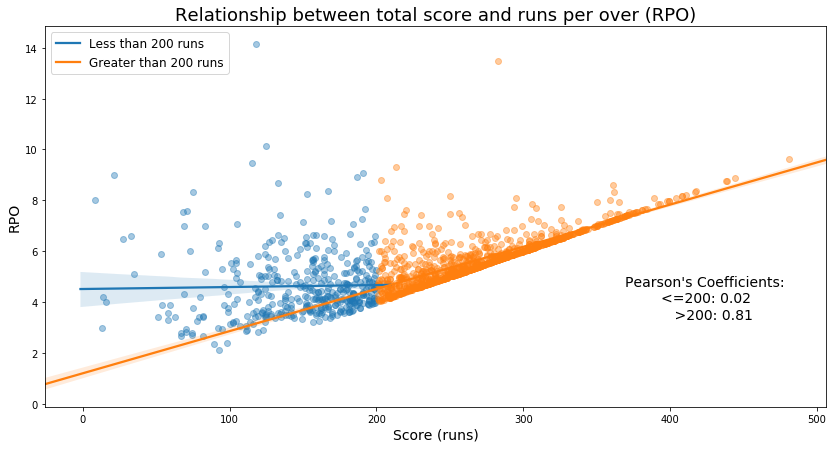

In [217]:
fig = plt.figure(figsize=[14,7])

sb.regplot(data=df_temp[df_temp.score_total <= 200], y='rpo', x='score_total', scatter_kws={'alpha':0.4});
sb.regplot(data=df_temp[df_temp.score_total > 200], y='rpo', x='score_total', scatter_kws={'alpha':0.4});

plt.title("Relationship between total score and runs per over (RPO)", fontsize=18);

plt.legend(fontsize=12,labels=['Less than 200 runs', 'Greater than 200 runs'], loc=2);
plt.xlabel("Score (runs)", fontsize=14);
plt.ylabel("RPO", fontsize=14);

corr1 = df_temp[df_temp.score_total <= 200].rpo.corr(df_temp[df_temp.score_total <= 200].score_total)
corr2 = df_temp[df_temp.score_total > 200].rpo.corr(df_temp[df_temp.score_total > 200].score_total)

fig.text(0.7,0.3, "Pearson's Coefficients:\n        <=200: {:.2f}\n           >200: {:.2f}".format(corr1, corr2),
        fontsize=14);

This chart shows some fairly interesting trends.
- Scores less than 200 has almost no positive correlation with rpo, with a pearsons cofficient of 0.02.
- Scores greater than 200 have a strong positive correlation with rpo, with a pearsons cofficient of 0.81.
- This increase in correlation strength gives rise to the hockey stick shape of the distribution.
- There is a dense line of points which form a baseline of which there are no points below. Scores below this line are impossible to achieve in 50 overs with that value of rpo.

### Coin Toss and Run Rate

- Story of batting second, score average and number of wins and using rpo
- 

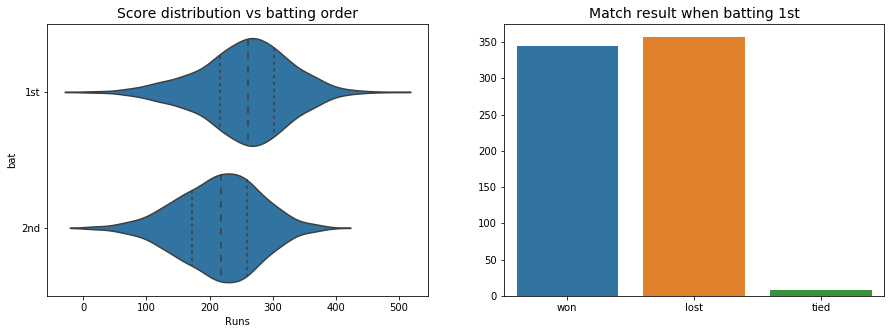

In [220]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sb.violinplot(data=df_totals, y="bat", x='score_total', color=colour, inner='quartile', order=['1st','2nd']);
plt.title("Score distribution vs batting order", fontsize=14);
plt.xlabel("Runs")

plt.subplot(1,2,2)
sb.barplot(x=['won', 'lost','tied'], y=[((df_totals.result=="won") & (df_totals.bat=="1st")).sum(), 
                                    ((df_totals.result=="lost") & (df_totals.bat=="1st")).sum(),
                                       ((df_totals.result=="tied") & (df_totals.bat=="1st")).sum()]);
plt.title("Match result when batting 1st", fontsize=14);

In [225]:
df_temp

,match_id,start_date,country,toss,bat,opposition,score_total,wickets,overs,rpo,result,result_margin,result_method
0,3315,2013-01-03,Pakistan,lost,1st,India,250.0,10,48.3,5.15,won,85.0,runs
1,3315,2013-01-03,India,won,2nd,Pakistan,165.0,10,48.0,3.43,lost,85.0,runs
2,3316,2013-01-06,Pakistan,lost,2nd,India,157.0,10,48.5,3.21,lost,10.0,runs
3,3316,2013-01-06,India,won,1st,Pakistan,167.0,10,43.4,3.82,won,10.0,runs
4,3317,2013-01-11,Sri Lanka,lost,2nd,Australia,198.0,10,40.0,4.95,lost,107.0,runs
5,3317,2013-01-11,Australia,won,1st,Sri Lanka,305.0,5,50.0,6.10,won,107.0,runs
6,3318,2013-01-11,India,lost,2nd,England,316.0,9,50.0,6.32,lost,9.0,runs
7,3318,2013-01-11,England,won,1st,India,325.0,4,50.0,6.50,won,9.0,runs
8,3319,2013-01-13,Sri Lanka,won,2nd,Australia,172.0,2,40.1,4.28,won,8.0,wickets
9,3319,2013-01-13,Australia,lost,1st,Sri Lanka,170.0,10,46.5,3.62,lost,8.0,wickets


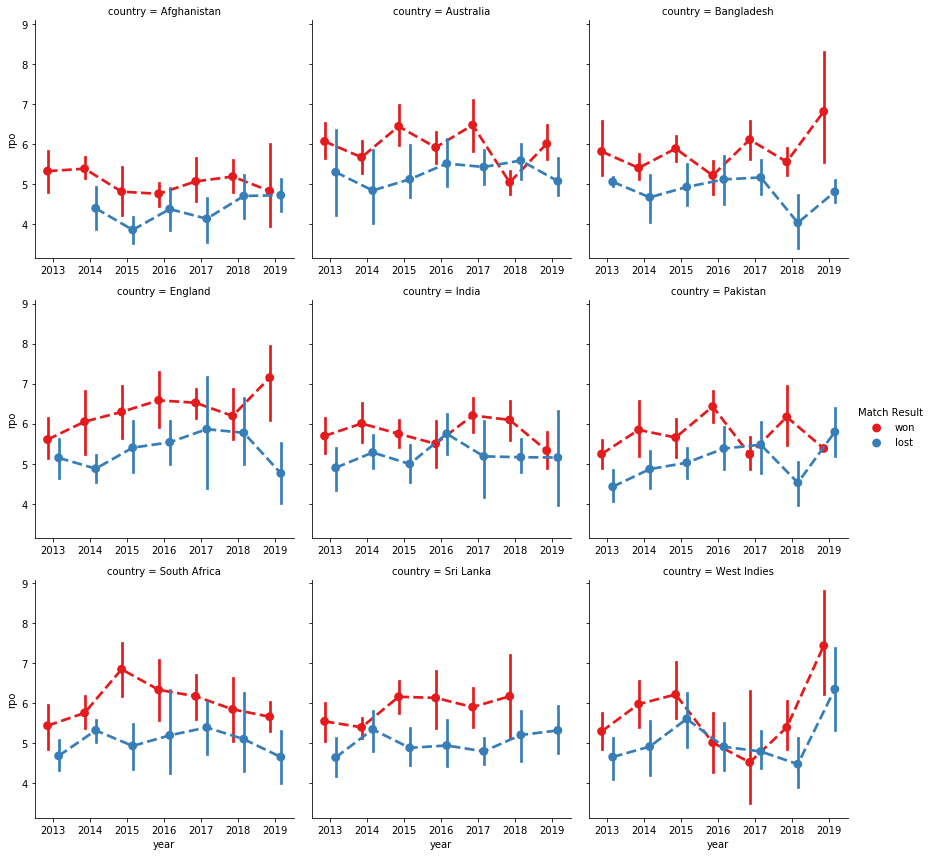

In [228]:
def pointplot(x,y,hue,**kwargs):
    sb.pointplot(x=x,y=y, hue=hue, **kwargs)

g = sb.FacetGrid(data=df_temp, col='country', col_order=cup_countries, col_wrap=3, height=4, sharex=False)
g.map(pointplot, 'year', 'rpo', 'result', hue_order=['won','lost'], dodge=0.3, palette="Set1", linestyles='--', ci=95)
g.add_legend(title="Match Result");

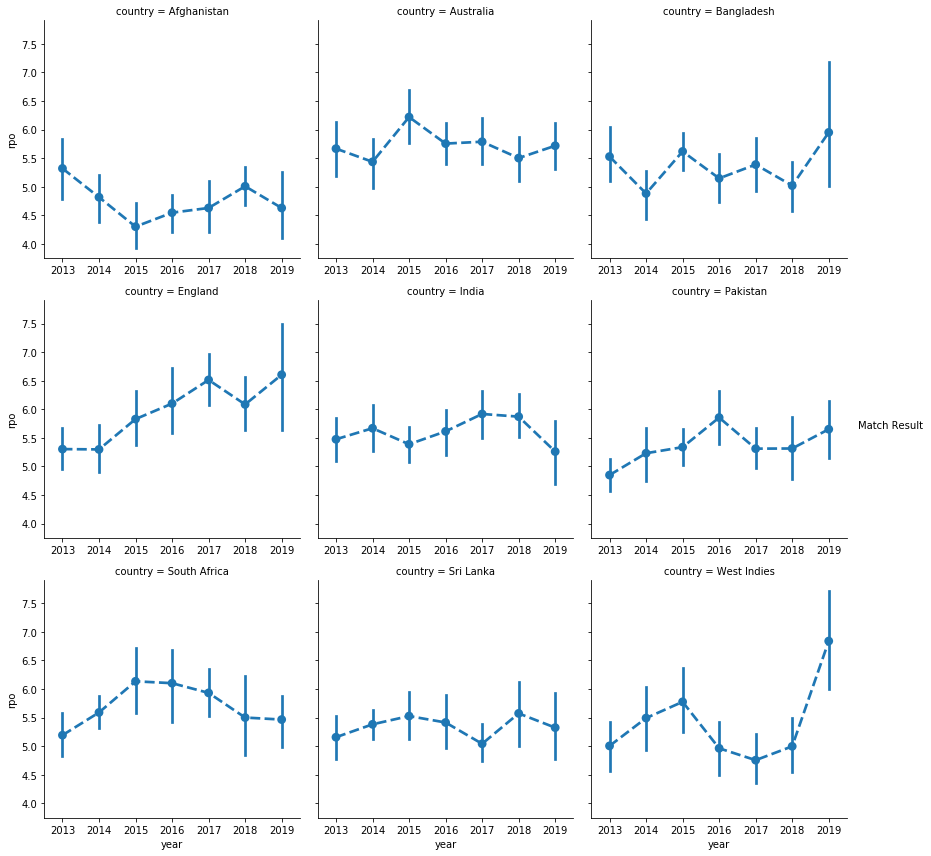

In [231]:
def pointplot(x,y,hue,**kwargs):
    sb.pointplot(x=x,y=y, hue=hue, **kwargs)

g = sb.FacetGrid(data=df_temp, col='country', col_order=cup_countries, col_wrap=3, height=4, sharex=False)
g.map(pointplot, 'year', 'rpo', hue=None, color=c[0], linestyles='--', ci=95)
g.add_legend(title="Match Result");

**Overall Performance:**
1. What is a good target score for a team to aim for in order to win the game?
1. What batting order is most common after winning the toss and what choice is most successful?
1. WHich team make the best choices?

In [232]:
ground_avg_rpo = df_temp.groupby('ground').mean()['rpo']
df_temp['rpo_vs_avg'] = np.NaN

for ground, avg in zip(ground_avg_rpo.index, ground_avg_rpo.values):
    df_temp['rpo_vs_avg'] = np.where(df_temp.ground == ground, df_temp.rpo - avg, df_temp.rpo_vs_avg)

KeyError: 'ground'

In [ ]:
bins = np.arange(df_temp.score_vs_avg.min(), df_temp.score_vs_avg.max()+25,25)

plt.figure(figsize=[15,5])
h2 = plt.hist2d(data=df_temp[df_temp.bat=='1st'], x='score_vs_avg', y='result', bins=[bins, [0,0.5,1]], vmin=0.5);
plt.yticks((0.25,0.75),('Lost','Won'))
plt.xlabel("Score vs ground average (runs)")
plt.colorbar(label='Match Counts');